[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/Nonparametric_3.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd ./gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)

/content/gdrive/My Drive/대학원수업/비모수회귀분석(함수추정)


In [6]:
#!pip install getdist
#!pip install KDEpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import KernelDensity
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import os
from getdist import plots, MCSamples
import getdist, IPython
from KDEpy import FFTKDE
from KDEpy import *
from scipy.stats import norm


    100% |████████████████████████████████| 174kB 7.1MB/s 
  Running setup.py bdist_wheel for getdist ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c7/d4/7e/605e7b567f16ab7b749da817da1009f892922f45f64e1eb189
Successfully built getdist
    100% |████████████████████████████████| 327kB 7.1MB/s 
    100% |████████████████████████████████| 12.9MB 3.4MB/s 
    100% |████████████████████████████████| 31.2MB 1.3MB/s 
    100% |████████████████████████████████| 952kB 11.0MB/s 
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


# 1. Estimate The Density of the first variable (refreactive index)

* Dataset = Forensic Glass Data From MASS

## 1.1 Using Epanechnikov kernel
* Bandwidth  : Scott
    * scott :  density 의 shape 가 normal 형태 일 때 최적이 된다. $ h=  \frac{3.5 \hat\sigma}{n^{1/3}} $ 
    * silverman  $ h = (\frac{4\hat\sigma^5}{3n})^{\frac{1}{5}} \approx  (1.06\hat\sigma^2n^{-\frac{1}{5} })$ 
        * Gaussian 을 기반으로한 MISE를 최소한으로 하는 badnwidth이라고 한다. 
        * Gaussian approximation 이라고도 한다.

In [0]:
data = pd.read_csv("Forensic_Glass.csv" )
data = data.iloc[:, 1:]
RI =  data.RI

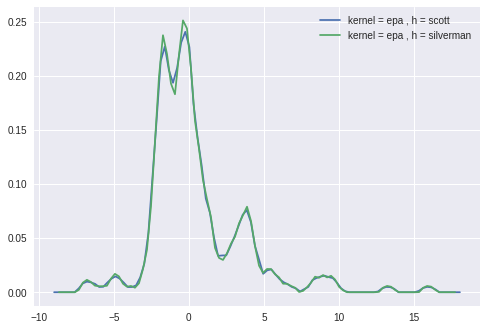

In [12]:
KERNEL = "epa"
sns.kdeplot(RI ,kernel=KERNEL,label="kernel = epa , h = scott"  , bw = "scott")
sns.kdeplot(RI ,kernel=KERNEL,label="kernel = epa , h = silverman" , bw = "silverman")


# 1.2 , 1.3 MISE , Rule of Thumb( scott , silverman )

## sns.kdeplot  ("Rule of Thumb") 
* defualt  kerenl = "gau"
* kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }
* bw : {‘scott’ | ‘silverman’ | scalar | pair of scalars }

* rule-of-thumb 
 
##  KDEpy (MISE)
* kernel : gaussian exponential box tri epa biweight triweight tricube cosine
* bw_method : ['silverman', 'scott', 'ISJ'] #  FFTKDE._bw_methods.keys()


$ MISE(h) = \mathbb{E}\int (\hat f(x ; h) - f(x))^2dx $


## Comment
* bandwith 이 커짐에 따라 완만한 곡선을 나타나는 것을 확인 할 수 있다.
* Kernel 에 따라서 BandWidth의 모양이 다르게 나온다.
* siverman 방법은 scott에 비해  분산이 영향을 주는게  작아서 좀 더  nonsmooth한 형태를 띄는 것 같다.

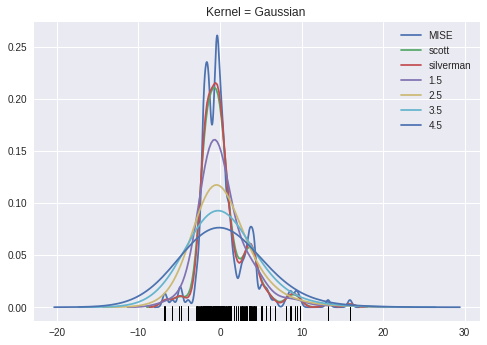

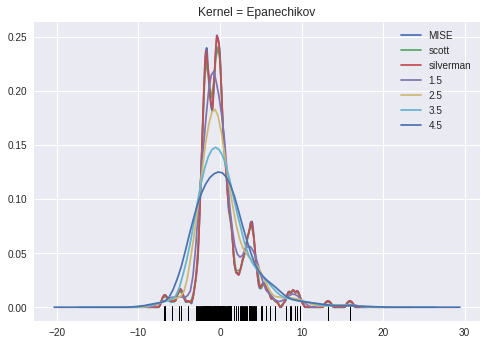

In [6]:
bw_options = ["scott", "silverman", 1.5 , 2.5 , 3.5 , 4.5 ]

data =RI.values
x, y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
sns.rugplot( RI ,color='black')

for bw in bw_options:
    sns.kdeplot(RI ,bw= bw,label=bw , kernel="gau")

plt.title("Kernel = Gaussian ")
plt.show()

data =RI.values
x, y = FFTKDE(kernel='epa', bw='ISJ').fit(data).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
bw_options = ["scott", "silverman", 1.5 , 2.5 , 3.5 , 4.5 ]
sns.rugplot( RI ,color='black')
for bw in bw_options:
    sns.kdeplot(RI ,bw= bw,label=bw , kernel="epa" )

plt.title("Kernel = Epanechikov")
plt.show()



# 2.2.1 Try to find a new real dataset which contains several variables 

* 1  Choose a Variable 
1. 2 Draw a histogram of it  
1. 3 Obtain a kernel density estimate  
1. 4 free kernel  , more than Three bandwihts 



In [0]:
data = pd.read_csv("creditcard.csv")

Text(0.5,1,'Histogram of V24')

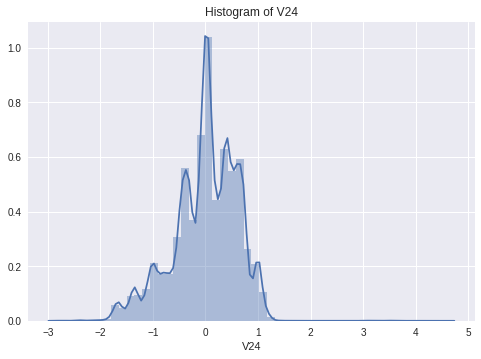

In [18]:
import warnings
warnings.filterwarnings('ignore')
# V26 V24
sns.distplot( data.V24  )
plt.title("Histogram of V24")

## Kernel Gaussian 과 Epanechnikov를 활용해서 그려봤습니다.
* ISJ(The Improved Sheather-Jones algorithm)  =  plug-in selector
    * $ E \sum(\hat f(x;h) - f(x))^2 dx $

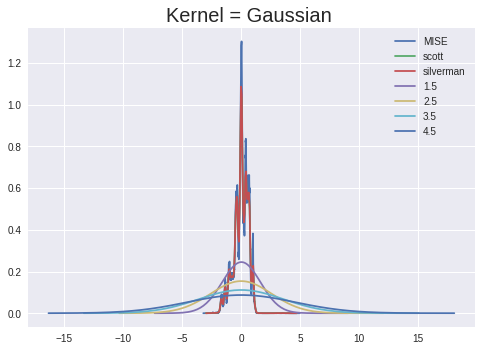

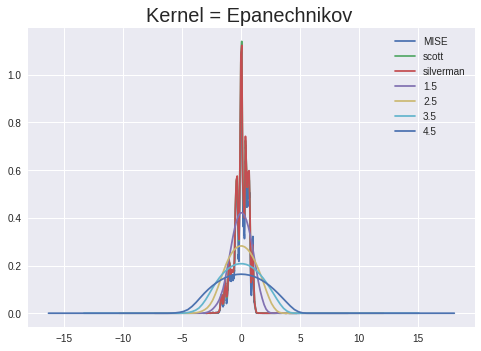

In [16]:
### Gaussian

data2 = data.V24.values
x, y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data2).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
bw_options = ["scott", "silverman", 1.5 , 2.5 , 3.5 , 4.5 ]
for bw in bw_options:
    sns.kdeplot( data.V24 ,bw= bw,label=bw , kernel="gau")
plt.title("Kernel = Gaussian ", fontsize = 20)
plt.show()

### EPA

x, y = FFTKDE(kernel='epa', bw='ISJ').fit(data2).evaluate()
## The Improved Sheather-Jones algorithm
plt.plot(x, y, label='MISE')
for bw in bw_options:
    sns.kdeplot( data.V24 ,bw= bw,label=bw , kernel="epa")
plt.title("Kernel = Epanechnikov " , fontsize = 20)
plt.show()

## sns.kdeplot  ("Rule of Thumb") 
* defualt  kerenl = "gau"
* kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }
* bw : {‘scott’ | ‘silverman’ | scalar | pair of scalars }


### free kernel  , more than Three bandwihts 

* Bandwidth :  MISE , scott , silverman 
* Kernel : "Gaussian" , "epa "


# 2.2.2 

* Find a Parametric Distribution for the variable you choose 
* Obtain the parameter estimates  
* Overlay this parametric density with your estimate from the above 
* Discuss on the above results or what you find


In [0]:
import re
"""
R에서의 Grep 함수와 유사함
"""
def grep(pattern,fileObj):
    r=[]
    for line in fileObj:
        if re.search(pattern,line):
            r.append(line )
    return r

## Estimate Kernel 

* 다양하게 모델을 fitting 할 수 있지만  bandwidht 에 따라 다르게 되지만 modal 이 한쪽에 크게 나오는 형태라서 Gaussian 계열의 분포로만 Fitting을 진행하였습니다.

 truncnorm Parameter Estimates : (-2.8856156480673523, 4.6445013279041145, 0.004841236663945769, 0.6487521757570078) 

 foldnorm Parameter Estimates : (2.896377924166454, -1.8672082037188804, 0.6475207660742153) 

 exponnorm Parameter Estimates : (0.028756025246434974, -0.008562146918825045, 0.6425890422099181) 

 lognorm Parameter Estimates : (0.0025942650719471185, -248.14717221786276, 248.15618176634206) 

 gennorm Parameter Estimates : (1.8882421546613788, 0.02134593184408271, 0.8811788313480018) 

 powernorm Parameter Estimates : (1452.298693550651, 6.304960372332609, 1.8795025439919038) 



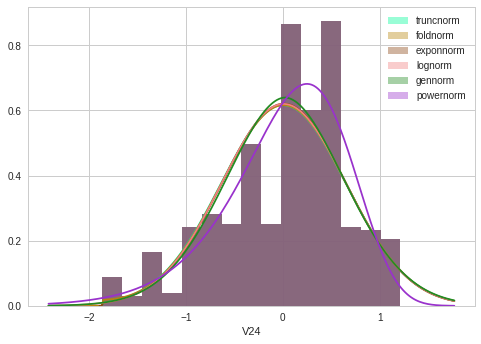

In [30]:
import warnings
warnings.filterwarnings('ignore')
sns.set( color_codes = True)
sns.set_style('whitegrid')



dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats, d), stats.rv_continuous)]
# norm 만 추출 
norms = grep("norm", dist_continu)
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = list( colors.keys()  ) 

number = 6
select = np.random.choice( norms , number , replace = False ) 
color = np.random.choice( colors , number , replace = False ) 
for i in range(number) :
    se = select[i]
    c  = color[i]
    stat = eval("stats." + se)
    sns.distplot(data.loc[:500, "V24"] ,label= se  , fit = stat , fit_kws={"color" : c } , kde= False   , color= c  )
    print(" {0} Parameter Estimates : {1} ".format(se , stat.fit(data.loc[:500, "V24"]) ) )
    print("")

plt.legend()
plt.show()

# The END

## stats.gaussian_kde 에서 bandwith 값 구하기 (2가지 방법)
* kde.factor


```
x1 = np.random.normal(0 ,1 , 50 )
kde = stats.gaussian_kde(x1 , bw_method="scott")
kde.factor
```


 
* kde.covariance_fator()

```
kde = stats.gaussian_kde(x1 , bw_method="scott")
h = kde.covariance_factor()
```



## bandwidth 값 바꾸는 방법
* stats.gaussian_kde(x1 , bw_method= kde.factor / 3. )
* kde.set_bandwidth(bw_method=kde.factor / 3.)

scott bandwidth  0.45730505192732634
silverman bandwidth  0.4843884136334891
silverman/3. bandwidth  0.16146280454449638


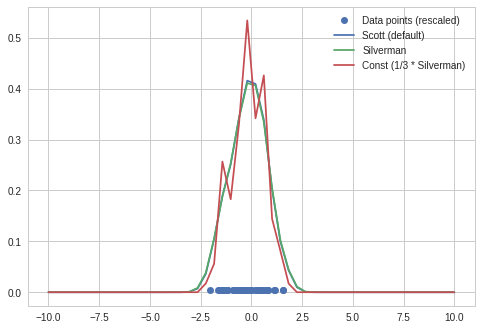

In [57]:
import scipy.stats as stats
x1 = np.random.normal(0 ,1 , 50 )
kde = stats.gaussian_kde(x1 , bw_method="scott")
xs = np.linspace(-10, 10, num=50)
y1 = kde(xs)
print("scott bandwidth " , kde.factor )
kde.set_bandwidth(bw_method='silverman')
y2 = kde(xs)
print("silverman bandwidth " , kde.factor )

kde.set_bandwidth(bw_method=kde.factor / 3.)
y3 = kde(xs)
print("silverman/3. bandwidth " , kde.factor )

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x1, np.ones(x1.shape) / (4. * x1.size), 'bo',
        label='Data points (rescaled)')
ax.plot(xs, y1, label='Scott (default)')
ax.plot(xs, y2, label='Silverman')
ax.plot(xs, y3, label='Const (1/3 * Silverman)')
ax.legend()
plt.show()

0.45730505192732634

In [56]:
kde = stats.gaussian_kde(x1 , bw_method="scott")
h = kde.covariance_factor()
print(h)
kde = stats.gaussian_kde(x1 , bw_method="silverman")
h = kde.covariance_factor()
print(h)
kde = stats.gaussian_kde(x1 , bw_method= kde.factor / 3. )
h = kde.covariance_factor()
print(h)

0.45730505192732634
0.4843884136334891
0.16146280454449638
